# IRON AIR - 2022

This is the IRON AIR project based in data collected from the WHOOP band.

IMPORT LIBRERIES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READ DATA

In [28]:
jouarnals = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/journal_entries.csv")
physiological_cycles = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/physiological_cycles.csv")
sleeps = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/sleeps.csv")
woorkouts = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/workouts.csv")

In [29]:
jouarnals

,Cycle start time,Cycle end time,Cycle timezone,Question text,Answered yes,Notes
0,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,Receive acupuncture therapy?,False,NaN
1,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,Consume added sugar?,True,NaN
2,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,Travel on a plane?,False,NaN
3,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,Have any alcoholic drinks?,False,NaN
4,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,Take anti-anxiety medication?,False,NaN
...,...,...,...,...,...,...
5269,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,Work late?,True,NaN
5270,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Travel on a plane?,True,NaN
5271,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Feel emotionally and mentally stable?,False,NaN
5272,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Experience jet lag?,True,NaN


In [30]:
physiological_cycles

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
0,2022-12-14 05:10:13,NaN,UTC+01:00,26.0,66.0,35.0,32.65,94.00,NaN,NaN,...,15.6,319.0,496.0,152.0,82.0,85.0,177.0,597.0,139.0,66.0
1,2022-12-13 05:35:22,2022-12-14 05:10:13,UTC+01:00,24.0,66.0,46.0,32.90,92.67,4.2,2466.0,...,15.9,229.0,359.0,142.0,38.0,49.0,130.0,586.0,126.0,67.0
2,2022-12-12 04:28:17,2022-12-13 05:35:22,UTC+01:00,73.0,67.0,58.0,32.25,90.19,5.8,2675.0,...,15.7,320.0,459.0,178.0,61.0,81.0,139.0,565.0,102.0,71.0
3,2022-12-11 04:19:07,2022-12-12 04:28:17,UTC+01:00,66.0,66.0,55.0,31.99,93.60,7.6,2724.0,...,15.9,303.0,476.0,191.0,31.0,81.0,173.0,553.0,93.0,63.0
4,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,93.0,65.0,64.0,32.12,93.00,5.8,2588.0,...,15.8,383.0,484.0,174.0,60.0,149.0,101.0,564.0,107.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2021-07-18 01:05:03,2021-07-19 01:37:24,UTC+02:00,37.0,67.0,46.0,NaN,NaN,10.1,2827.0,...,16.0,305.0,422.0,105.0,76.0,124.0,117.0,618.0,123.0,72.0
489,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,40.0,64.0,46.0,NaN,NaN,15.1,3682.0,...,15.8,373.0,454.0,170.0,86.0,117.0,81.0,644.0,176.0,82.0
490,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,24.0,71.0,37.0,NaN,NaN,9.6,2158.0,...,15.4,115.0,158.0,87.0,25.0,3.0,43.0,508.0,139.0,72.0
491,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,26.0,72.0,34.0,NaN,NaN,13.4,3215.0,...,16.5,147.0,173.0,85.0,33.0,29.0,26.0,381.0,35.0,85.0


In [31]:
woorkouts

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2022-12-11 04:19:07,2022-12-12 04:28:17,UTC+01:00,2022-12-11 13:09:39,2022-12-11 13:52:10,42,Weightlifting,6.1,221.0,149.0,120.0,1.0,23.0,61.0,13.0,0.0,False,NaN,NaN,NaN
1,2022-12-08 03:52:31,2022-12-09 02:41:25,UTC+01:00,2022-12-08 19:20:09,2022-12-08 20:03:16,43,Weightlifting,6.7,275.0,162.0,125.0,0.0,16.0,57.0,24.0,0.0,False,NaN,NaN,NaN
2,2022-12-07 02:19:37,2022-12-08 03:52:31,UTC+01:00,2022-12-07 18:58:18,2022-12-07 19:22:39,24,Running,6.0,163.0,157.0,125.0,2.0,27.0,31.0,37.0,0.0,False,NaN,NaN,NaN
3,2022-12-06 03:22:09,2022-12-07 02:19:37,UTC+01:00,2022-12-06 19:04:01,2022-12-06 19:27:44,23,Running,7.9,266.0,167.0,144.0,0.0,0.0,13.0,61.0,23.0,False,NaN,NaN,NaN
4,2022-12-05 02:19:37,2022-12-06 03:22:09,UTC+01:00,2022-12-05 09:14:09,2022-12-05 09:44:24,30,Weightlifting,6.1,214.0,150.0,127.0,0.0,3.0,65.0,30.0,0.0,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2021-07-31 01:31:51,2021-08-01 01:54:10,UTC+02:00,2021-07-31 20:28:56,2021-07-31 21:01:16,32,Running,8.1,298.0,158.0,134.0,0.0,11.0,16.0,68.0,3.0,False,NaN,NaN,NaN
389,2021-07-29 01:54:27,2021-07-30 00:33:28,UTC+02:00,2021-07-29 20:24:41,2021-07-29 20:50:59,26,Running,8.8,305.0,169.0,144.0,0.0,0.0,7.0,62.0,28.0,False,NaN,NaN,NaN
390,2021-07-26 23:07:56,2021-07-28 00:33:28,UTC+02:00,2021-07-27 20:25:35,2021-07-27 21:00:11,34,Activity,8.5,326.0,165.0,135.0,0.0,2.0,33.0,54.0,9.0,False,NaN,NaN,NaN
391,2021-07-19 01:37:24,2021-07-19 23:47:00,UTC+02:00,2021-07-19 08:11:56,2021-07-19 08:55:32,43,Running,9.6,390.0,171.0,133.0,0.0,5.0,39.0,31.0,23.0,False,NaN,NaN,NaN


In [32]:
sleeps

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap
0,2022-12-14 05:10:13,NaN,UTC+01:00,2022-12-14 16:47:39,2022-12-14 18:11:17,13.0,15.6,76.0,83.0,37.0,22.0,17.0,7.0,599.0,137.0,94.0,True
1,2022-12-14 05:10:13,NaN,UTC+01:00,2022-12-14 05:10:13,2022-12-14 13:26:26,53.0,15.6,319.0,496.0,152.0,82.0,85.0,177.0,597.0,139.0,66.0,False
2,2022-12-13 05:35:22,2022-12-14 05:10:13,UTC+01:00,2022-12-13 05:35:22,2022-12-13 11:35:08,39.0,15.9,229.0,359.0,142.0,38.0,49.0,130.0,586.0,126.0,67.0,False
3,2022-12-12 04:28:17,2022-12-13 05:35:22,UTC+01:00,2022-12-12 04:28:17,2022-12-12 12:09:14,57.0,15.7,320.0,459.0,178.0,61.0,81.0,139.0,565.0,102.0,71.0,False
4,2022-12-11 04:19:07,2022-12-12 04:28:17,UTC+01:00,2022-12-11 04:19:07,2022-12-11 12:15:26,55.0,15.9,303.0,476.0,191.0,31.0,81.0,173.0,553.0,93.0,63.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,2021-07-16 23:00:45,2021-07-17 06:34:33,58.0,15.8,373.0,454.0,170.0,86.0,117.0,81.0,644.0,176.0,82.0,False
516,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,2021-07-16 04:21:47,2021-07-16 06:59:49,23.0,15.4,115.0,158.0,87.0,25.0,3.0,43.0,508.0,139.0,72.0,False
517,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,2021-07-15 15:43:36,2021-07-15 17:50:51,19.0,14.2,115.0,127.0,65.0,19.0,31.0,12.0,607.0,139.0,94.0,True
518,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,2021-07-15 03:42:30,2021-07-15 06:35:53,39.0,16.5,147.0,173.0,85.0,33.0,29.0,26.0,381.0,35.0,85.0,False


Just after reading these first csv we realize that the phisiological_cycles dataset gives us almost 99% of the same data as the sleeps dataset

In [33]:
jouarnals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cycle start time  5274 non-null   object 
 1   Cycle end time    5274 non-null   object 
 2   Cycle timezone    5274 non-null   object 
 3   Question text     5274 non-null   object 
 4   Answered yes      5274 non-null   bool   
 5   Notes             0 non-null      float64
dtypes: bool(1), float64(1), object(4)
memory usage: 211.3+ KB


In [34]:
physiological_cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             493 non-null    object 
 1   Cycle end time               492 non-null    object 
 2   Cycle timezone               493 non-null    object 
 3   Recovery score %             453 non-null    float64
 4   Resting heart rate (bpm)     453 non-null    float64
 5   Heart rate variability (ms)  453 non-null    float64
 6   Skin temp (celsius)          263 non-null    float64
 7   Blood oxygen %               263 non-null    float64
 8   Day Strain                   474 non-null    float64
 9   Energy burned (cal)          482 non-null    float64
 10  Max HR (bpm)                 482 non-null    float64
 11  Average HR (bpm)             482 non-null    float64
 12  Sleep onset                  453 non-null    object 
 13  Wake onset          

In [35]:
woorkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cycle start time          393 non-null    object 
 1   Cycle end time            393 non-null    object 
 2   Cycle timezone            393 non-null    object 
 3   Workout start time        393 non-null    object 
 4   Workout end time          393 non-null    object 
 5   Duration (min)            393 non-null    int64  
 6   Activity name             393 non-null    object 
 7   Activity Strain           334 non-null    float64
 8   Energy burned (cal)       359 non-null    float64
 9   Max HR (bpm)              359 non-null    float64
 10  Average HR (bpm)          359 non-null    float64
 11  HR Zone 1 %               359 non-null    float64
 12  HR Zone 2 %               359 non-null    float64
 13  HR Zone 3 %               359 non-null    float64
 14  HR Zone 4 

In [36]:
sleeps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cycle start time            520 non-null    object 
 1   Cycle end time              518 non-null    object 
 2   Cycle timezone              520 non-null    object 
 3   Sleep onset                 520 non-null    object 
 4   Wake onset                  520 non-null    object 
 5   Sleep performance %         516 non-null    float64
 6   Respiratory rate (rpm)      515 non-null    float64
 7   Asleep duration (min)       516 non-null    float64
 8   In bed duration (min)       516 non-null    float64
 9   Light sleep duration (min)  516 non-null    float64
 10  Deep (SWS) duration (min)   516 non-null    float64
 11  REM duration (min)          516 non-null    float64
 12  Awake duration (min)        516 non-null    float64
 13  Sleep need (min)            516 non

In [37]:
jouarnals.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone', 'Question text',
       'Answered yes', 'Notes'],
      dtype='object')

In [38]:
physiological_cycles.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %'],
      dtype='object')

In [39]:
sleeps.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone', 'Sleep onset',
       'Wake onset', 'Sleep performance %', 'Respiratory rate (rpm)',
       'Asleep duration (min)', 'In bed duration (min)',
       'Light sleep duration (min)', 'Deep (SWS) duration (min)',
       'REM duration (min)', 'Awake duration (min)', 'Sleep need (min)',
       'Sleep debt (min)', 'Sleep efficiency %', 'Nap'],
      dtype='object')

In [40]:
woorkouts.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Workout start time', 'Workout end time', 'Duration (min)',
       'Activity name', 'Activity Strain', 'Energy burned (cal)',
       'Max HR (bpm)', 'Average HR (bpm)', 'HR Zone 1 %', 'HR Zone 2 %',
       'HR Zone 3 %', 'HR Zone 4 %', 'HR Zone 5 %', 'GPS enabled',
       'Distance (meters)', 'Altitude gain (meters)',
       'Altitude change (meters)'],
      dtype='object')

NULL DATA SEARCH

In [45]:
jouarnals.isnull().sum()

Cycle start time       0
Cycle end time         0
Cycle timezone         0
Question text          0
Answered yes           0
Notes               5274
dtype: int64

In [46]:
physiological_cycles.isnull().sum()

Cycle start time                 0
Cycle end time                   1
Cycle timezone                   0
Recovery score %                40
Resting heart rate (bpm)        40
Heart rate variability (ms)     40
Skin temp (celsius)            230
Blood oxygen %                 230
Day Strain                      19
Energy burned (cal)             11
Max HR (bpm)                    11
Average HR (bpm)                11
Sleep onset                     40
Wake onset                      40
Sleep performance %             40
Respiratory rate (rpm)          40
Asleep duration (min)           40
In bed duration (min)           40
Light sleep duration (min)      40
Deep (SWS) duration (min)       40
REM duration (min)              40
Awake duration (min)            40
Sleep need (min)                40
Sleep debt (min)                40
Sleep efficiency %              40
dtype: int64

In [48]:
sleeps.isnull().sum()

Cycle start time              0
Cycle end time                2
Cycle timezone                0
Sleep onset                   0
Wake onset                    0
Sleep performance %           4
Respiratory rate (rpm)        5
Asleep duration (min)         4
In bed duration (min)         4
Light sleep duration (min)    4
Deep (SWS) duration (min)     4
REM duration (min)            4
Awake duration (min)          4
Sleep need (min)              4
Sleep debt (min)              4
Sleep efficiency %            4
Nap                           0
dtype: int64

In [49]:
woorkouts.isnull().sum()

Cycle start time              0
Cycle end time                0
Cycle timezone                0
Workout start time            0
Workout end time              0
Duration (min)                0
Activity name                 0
Activity Strain              59
Energy burned (cal)          34
Max HR (bpm)                 34
Average HR (bpm)             34
HR Zone 1 %                  34
HR Zone 2 %                  34
HR Zone 3 %                  34
HR Zone 4 %                  34
HR Zone 5 %                  34
GPS enabled                   0
Distance (meters)           392
Altitude gain (meters)      392
Altitude change (meters)    392
dtype: int64

## EDA Analysing Data [PHYSIOLOGICAL CYCLES]

In [57]:
physiological_cycles['month'] = pd.DatetimeIndex(physiological_cycles['Cycle start time']).month
physiological_cycles['day'] = pd.DatetimeIndex(physiological_cycles['Cycle start time']).day

In [58]:
physiological_cycles

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,month,day
0,2022-12-14 05:10:13,NaN,UTC+01:00,26.0,66.0,35.0,32.65,94.00,NaN,NaN,...,496.0,152.0,82.0,85.0,177.0,597.0,139.0,66.0,12,14
1,2022-12-13 05:35:22,2022-12-14 05:10:13,UTC+01:00,24.0,66.0,46.0,32.90,92.67,4.2,2466.0,...,359.0,142.0,38.0,49.0,130.0,586.0,126.0,67.0,12,13
2,2022-12-12 04:28:17,2022-12-13 05:35:22,UTC+01:00,73.0,67.0,58.0,32.25,90.19,5.8,2675.0,...,459.0,178.0,61.0,81.0,139.0,565.0,102.0,71.0,12,12
3,2022-12-11 04:19:07,2022-12-12 04:28:17,UTC+01:00,66.0,66.0,55.0,31.99,93.60,7.6,2724.0,...,476.0,191.0,31.0,81.0,173.0,553.0,93.0,63.0,12,11
4,2022-12-10 03:57:07,2022-12-11 04:19:07,UTC+01:00,93.0,65.0,64.0,32.12,93.00,5.8,2588.0,...,484.0,174.0,60.0,149.0,101.0,564.0,107.0,80.0,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2021-07-18 01:05:03,2021-07-19 01:37:24,UTC+02:00,37.0,67.0,46.0,NaN,NaN,10.1,2827.0,...,422.0,105.0,76.0,124.0,117.0,618.0,123.0,72.0,7,18
489,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,40.0,64.0,46.0,NaN,NaN,15.1,3682.0,...,454.0,170.0,86.0,117.0,81.0,644.0,176.0,82.0,7,16
490,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,24.0,71.0,37.0,NaN,NaN,9.6,2158.0,...,158.0,87.0,25.0,3.0,43.0,508.0,139.0,72.0,7,16
491,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,26.0,72.0,34.0,NaN,NaN,13.4,3215.0,...,173.0,85.0,33.0,29.0,26.0,381.0,35.0,85.0,7,15


In [60]:
physiological_cycles['month'].value_counts()

10    59
9     59
8     57
11    55
7     49
12    40
3     31
6     29
4     29
1     29
5     28
2     28
Name: month, dtype: int64

In [62]:
physiological_cycles['Blood oxygen %'].value_counts()

93.00    7
92.50    6
96.00    6
93.25    5
95.50    5
        ..
93.35    1
94.19    1
95.36    1
92.58    1
93.77    1
Name: Blood oxygen %, Length: 166, dtype: int64

In [64]:
physiological_cycles['Skin temp (celsius)'].value_counts()

31.80    14
32.10    14
32.20    13
32.40    13
32.30    13
         ..
34.00     1
33.03     1
31.77     1
31.67     1
32.59     1
Name: Skin temp (celsius), Length: 99, dtype: int64

In [65]:
physiological_cycles['Recovery score %'].value_counts()

36.0    16
44.0    13
68.0    12
65.0    12
47.0    11
        ..
95.0     1
98.0     1
11.0     1
29.0     1
14.0     1
Name: Recovery score %, Length: 89, dtype: int64

In [68]:
physiological_cycles.groupby('month')['Recovery score %'].mean()

month
1     58.814815
2     55.464286
3     60.000000
4     51.000000
5     72.411765
6     66.448276
7     50.500000
8     56.956522
9     58.689655
10    57.696429
11    52.725490
12    54.891892
Name: Recovery score %, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Recovery score %'>

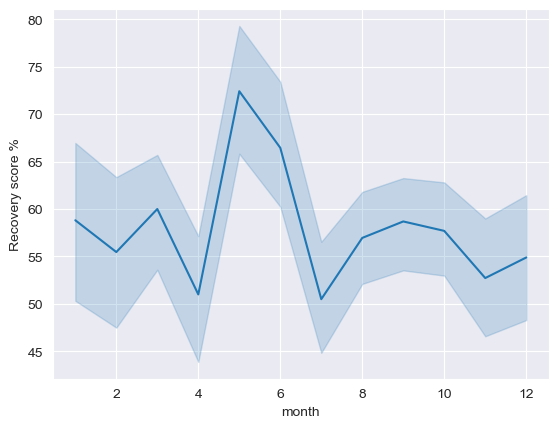

In [70]:
sns.lineplot(x='month', y='Recovery score %', data=physiological_cycles, ci=95)

<AxesSubplot:xlabel='month', ylabel='Heart rate variability (ms)'>

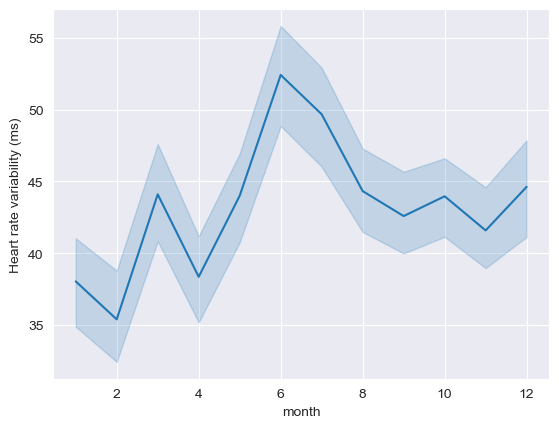

In [72]:
sns.lineplot(x='month', y='Heart rate variability (ms)', data=physiological_cycles, ci=95)

<AxesSubplot:xlabel='month', ylabel='Day Strain'>

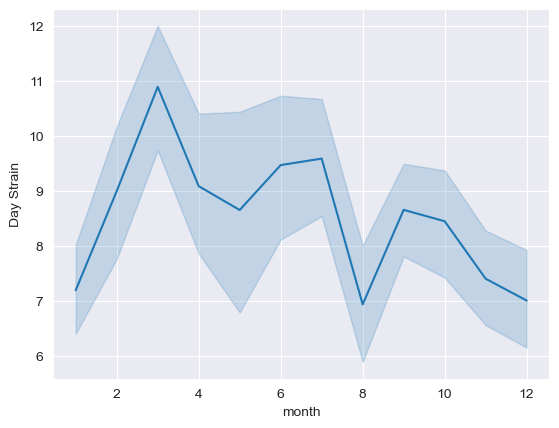

In [74]:
sns.lineplot(x='month', y='Day Strain', data=physiological_cycles, ci=95)

<AxesSubplot:xlabel='month', ylabel='Energy burned (cal)'>

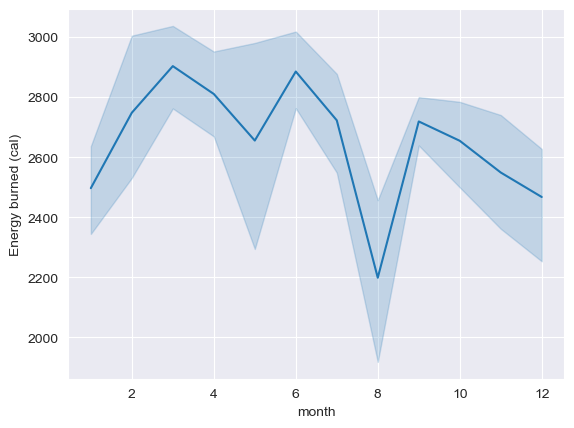

In [75]:
sns.lineplot(x='month', y='Energy burned (cal)', data=physiological_cycles, ci=95)

<AxesSubplot:xlabel='month', ylabel='Sleep performance %'>

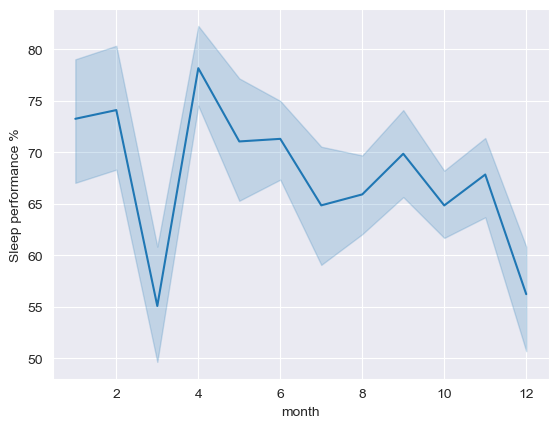

In [80]:
sns.lineplot(x='month', y='Sleep performance %', data=physiological_cycles, ci=95)

In [79]:
physiological_cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             493 non-null    object 
 1   Cycle end time               492 non-null    object 
 2   Cycle timezone               493 non-null    object 
 3   Recovery score %             453 non-null    float64
 4   Resting heart rate (bpm)     453 non-null    float64
 5   Heart rate variability (ms)  453 non-null    float64
 6   Skin temp (celsius)          263 non-null    float64
 7   Blood oxygen %               263 non-null    float64
 8   Day Strain                   474 non-null    float64
 9   Energy burned (cal)          482 non-null    float64
 10  Max HR (bpm)                 482 non-null    float64
 11  Average HR (bpm)             482 non-null    float64
 12  Sleep onset                  453 non-null    object 
 13  Wake onset          

<AxesSubplot:xlabel='month', ylabel='Deep (SWS) duration (min)'>

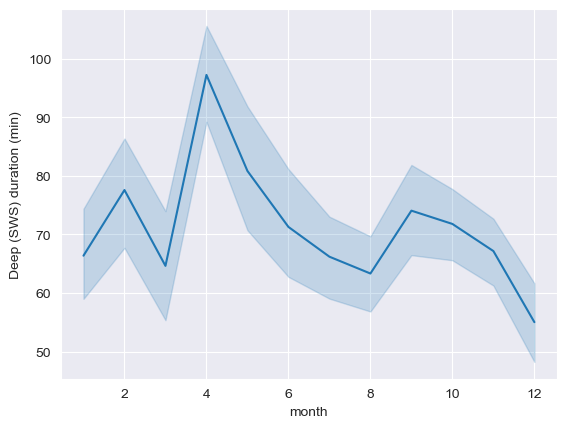

In [82]:
sns.lineplot(x='month', y='Deep (SWS) duration (min)', data=physiological_cycles, ci=95)